# Libraries

In [56]:
# Import necessary libraries
import pandas as pd
import numpy as np
import os
import librosa
import librosa.display
import matplotlib.pyplot as plt
import seaborn as sns
import IPython
import warnings

# Ignore warnings for a cleaner output
warnings.filterwarnings('ignore')

# Dataset

In [57]:
# Dataset Path
Ravdess_Path = 'Ravdess/audio_speech_actors_01-24'

# Data Analysis

In [58]:
# Initialize an empty list to store tuples of emotion labels and file paths
ravdess = []

# Iterate through directories in the specified path
for directory in os.listdir(Ravdess_Path):
    # List all files in the current actor's directory
    actors = os.listdir(os.path.join(Ravdess_Path, directory))

    # Iterate through audio files in the actor's directory
    for wav in actors:
        # Extract emotion information from the file name
        emotion = wav.partition('.wav')[0].split('-')

        # Convert the extracted emotion number to an integer
        emotion_number = int(emotion[2])

        # Append a tuple of emotion number and file path to the ravdess list
        ravdess.append((emotion_number, os.path.join(Ravdess_Path, directory, wav)))

# Create a DataFrame from the list of emotion-label-file-path tuples
Ravdess_df = pd.DataFrame.from_dict(ravdess)

# Rename DataFrame columns for clarity
Ravdess_df.rename(columns={0: 'Emotion', 1: 'File_Path'}, inplace=True)

# Replace numeric emotion labels with corresponding emotional categories
Ravdess_df['Emotion'].replace({1: 'neutral', 2: 'calm', 3: 'happy', 4: 'sad', 5: 'angry', 6: 'fearful', 7: 'disgust', 8: 'surprise'}, inplace=True)

# Display the first 15 rows of the DataFrame
Ravdess_df.head(15)

Emotion                                          File_Path
0   neutral  Ravdess/audio_speech_actors_01-24\Actor_01\03-...
1   neutral  Ravdess/audio_speech_actors_01-24\Actor_01\03-...
2   neutral  Ravdess/audio_speech_actors_01-24\Actor_01\03-...
3   neutral  Ravdess/audio_speech_actors_01-24\Actor_01\03-...
4      calm  Ravdess/audio_speech_actors_01-24\Actor_01\03-...
5      calm  Ravdess/audio_speech_actors_01-24\Actor_01\03-...
6      calm  Ravdess/audio_speech_actors_01-24\Actor_01\03-...
7      calm  Ravdess/audio_speech_actors_01-24\Actor_01\03-...
8      calm  Ravdess/audio_speech_actors_01-24\Actor_01\03-...
9      calm  Ravdess/audio_speech_actors_01-24\Actor_01\03-...
10     calm  Ravdess/audio_speech_actors_01-24\Actor_01\03-...
11     calm  Ravdess/audio_speech_actors_01-24\Actor_01\03-...
12    happy  Ravdess/audio_speech_actors_01-24\Actor_01\03-...
13    happy  Ravdess/audio_speech_actors_01-24\Actor_01\03-...
14    happy  Ravdess/audio_speech_actors_01-24\Actor_01\03-...

In [59]:
# Shape of the Dataset
Ravdess_df.shape

(1440, 2)

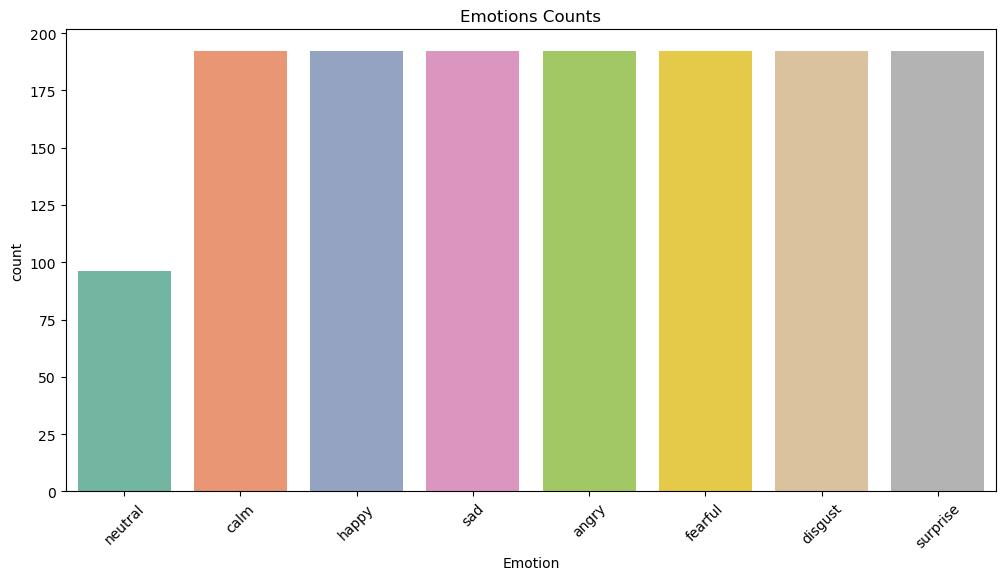

In [60]:
# Create a figure with a specific size
plt.figure(figsize=(12, 6))

# Set the title of the plot
plt.title('Emotions Counts')

# Create a count plot of emotions using Seaborn
emotions = sns.countplot(x='Emotion', data=Ravdess_df, palette='Set2')

# Rotate the x-axis labels for better visibility
emotions.set_xticklabels(emotions.get_xticklabels(), rotation=45)

# Display the plot
plt.show()

In [61]:
# Define colors for different emotions
colors = {
    'disgust': '#804E2D',   # Brown
    'happy': '#F19C0E',     # Orange
    'sad': '#478FB8',       # Blue
    'neutral': '#4CB847',   # Green
    'fearful': '#7D55AA',      # Purple
    'angry': '#C00808',     # Red
    'surprise': '#EE00FF',  # Pink
    'calm': '#00FFFF'       # Cyan
}

In [62]:
def wave_plot(data, sr, emotion, color):
    """
    Generate a waveplot for audio data.

    Parameters:
    - data (numpy.ndarray): Audio data.
    - sr (int): Sampling rate of the audio data.
    - emotion (str): Emotion label.
    - color (str): Color code for the waveplot.

    Returns:
    - matplotlib.figure: The generated figure.
    """
    # Create a new figure with a specified size
    plt.figure(figsize=(12, 5))

    # Set the title of the plot with emotion information
    plt.title(f'{emotion} emotion for waveplot', size=17)

    # Display the waveplot using librosa's waveshow function
    librosa.display.waveshow(y=data, sr=sr, color=color)

    # Return the generated figure
    return plt.gcf()

In [63]:
def spectrogram(data, sr, emotion):
    """
    Generate a spectrogram for audio data.

    Parameters:
    - data (numpy.ndarray): Audio data.
    - sr (int): Sampling rate of the audio data.
    - emotion (str): Emotion label.

    Returns:
    - matplotlib.figure: The generated figure.
    """
    # Compute the short-time Fourier transform (spectrogram) of the audio data
    audio = librosa.stft(data)

    # Convert the amplitude to decibels for better visualization
    audio_db = librosa.amplitude_to_db(abs(audio))

    # Create a new figure with a specified size
    plt.figure(figsize=(12, 5))

    # Set the title of the plot with emotion information
    plt.title(f'{emotion} emotion for spectrogram', size=17)

    # Display the spectrogram using librosa's specshow function
    librosa.display.specshow(audio_db, sr=sr, x_axis='time', y_axis='hz')

    # Return the generated figure
    return plt.gcf()


In [64]:
# Getting unique emotion names from the 'Emotion' column in the Ravdess DataFrame
emotion_names = Ravdess_df['Emotion'].unique()
emotion_names

array(['neutral', 'calm', 'happy', 'sad', 'angry', 'fearful', 'disgust',
       'surprise'], dtype=object)

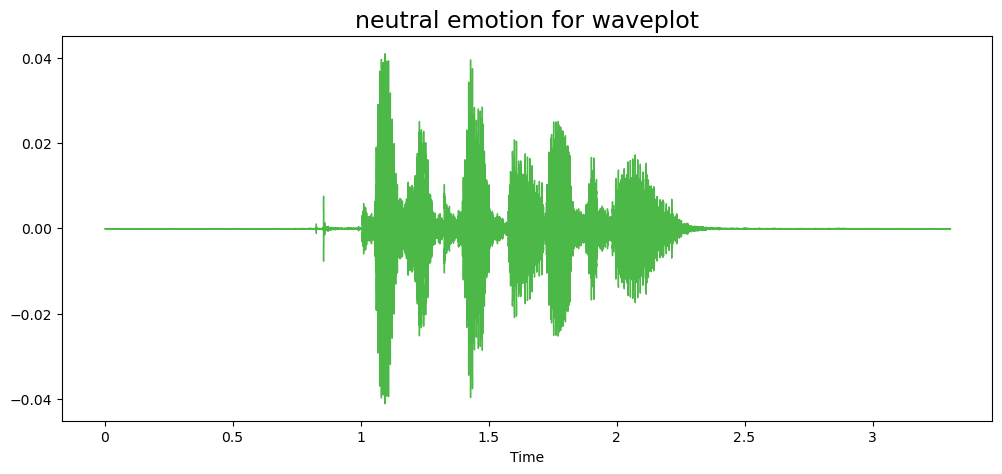

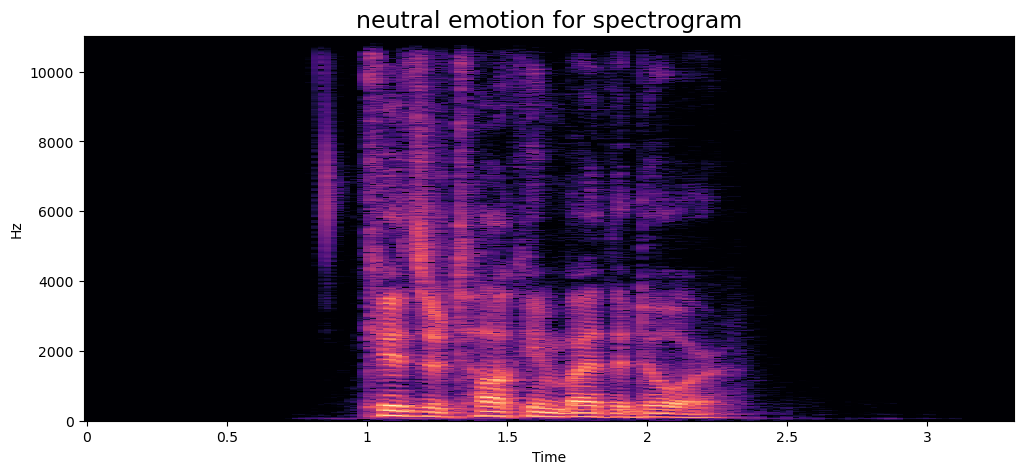

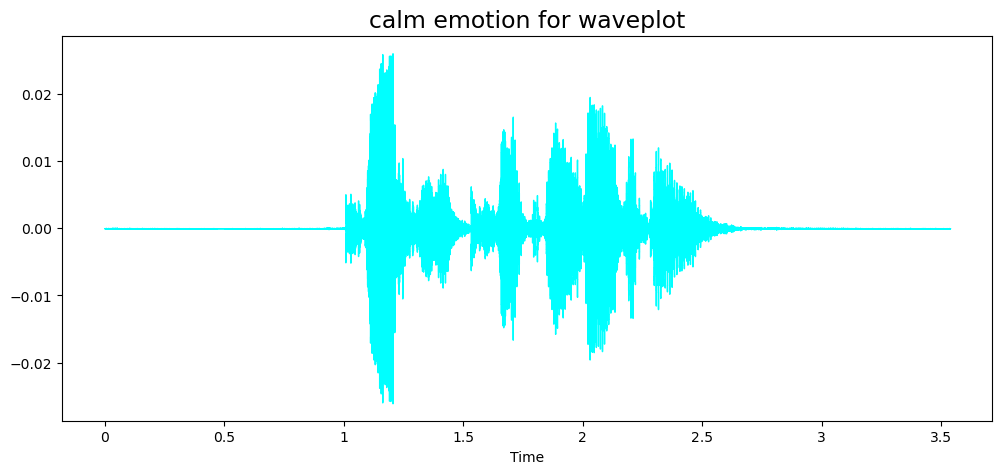

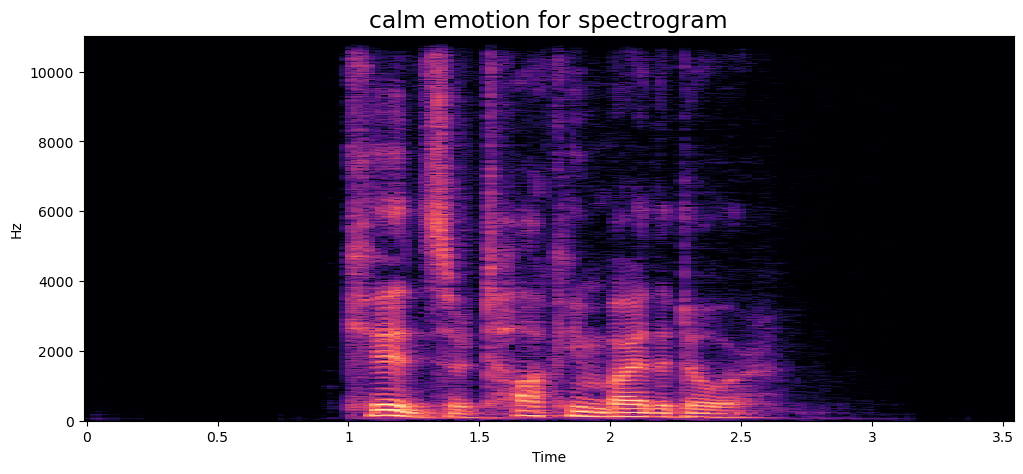

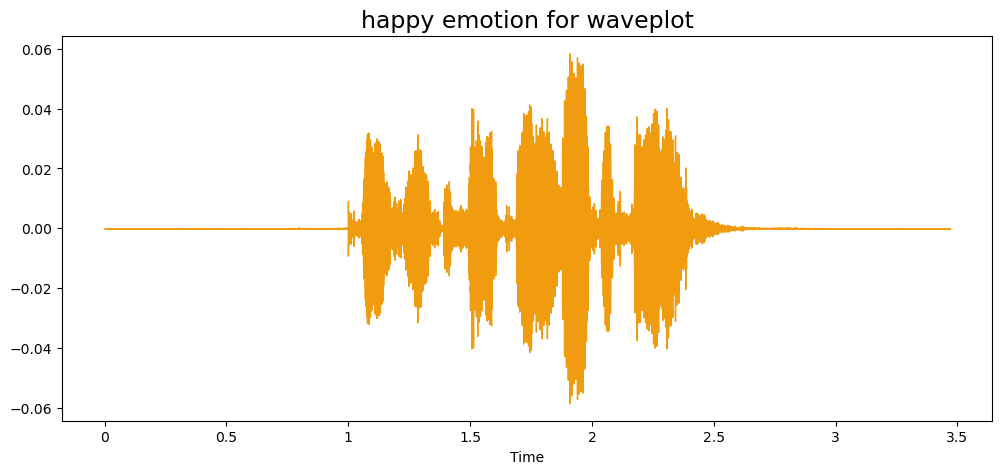

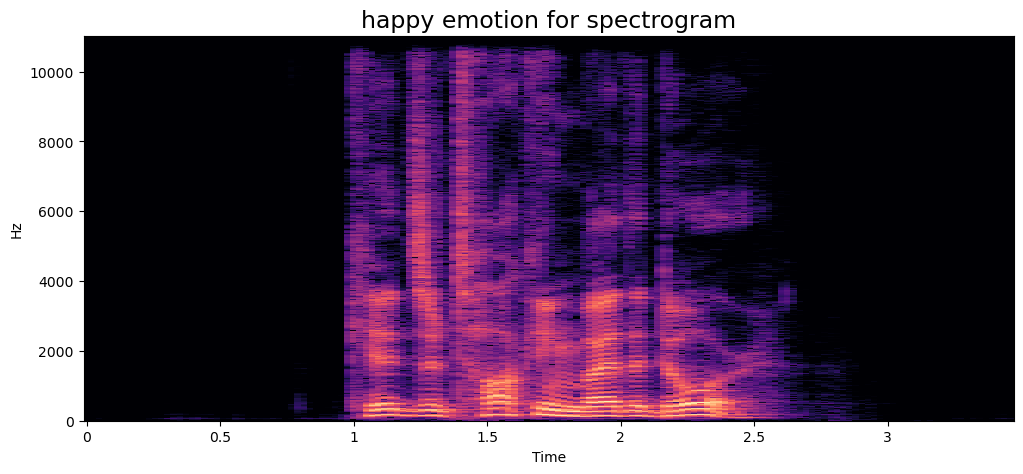

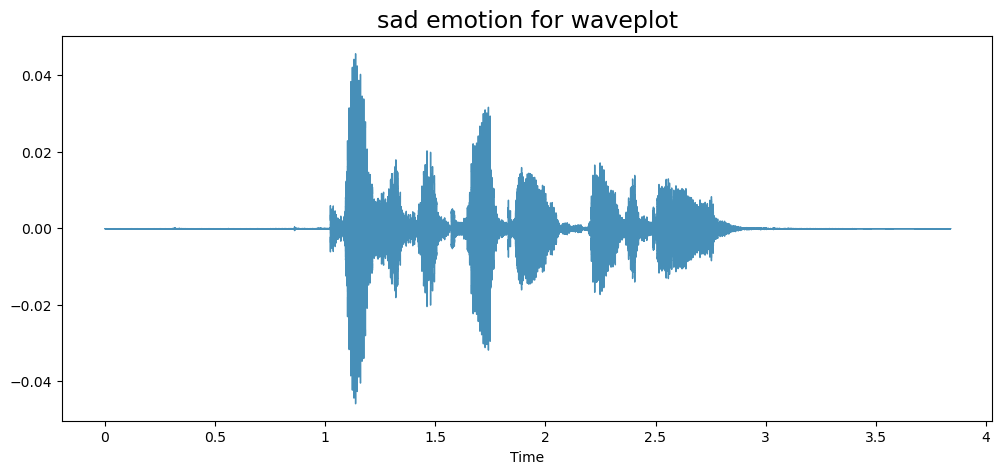

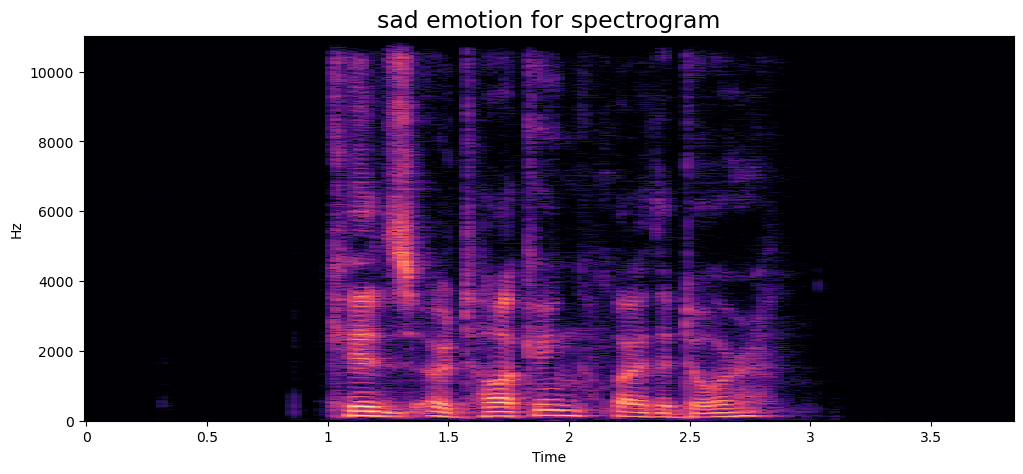

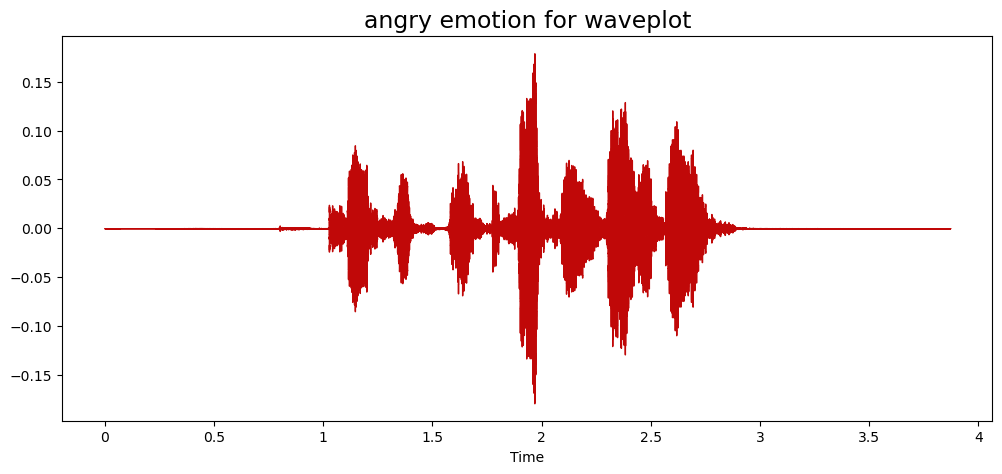

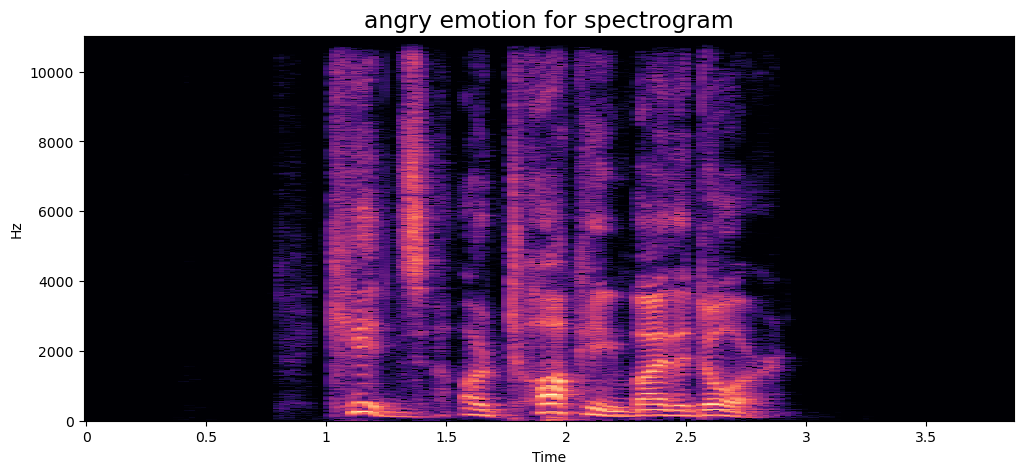

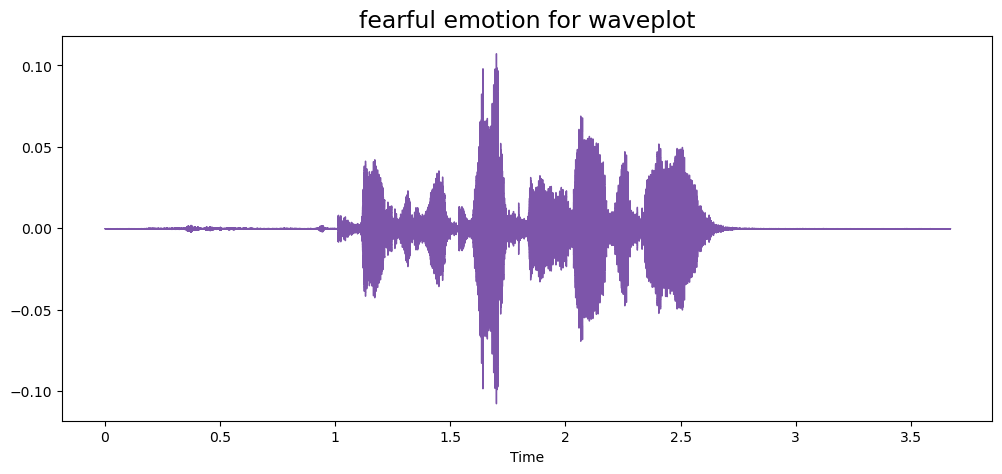

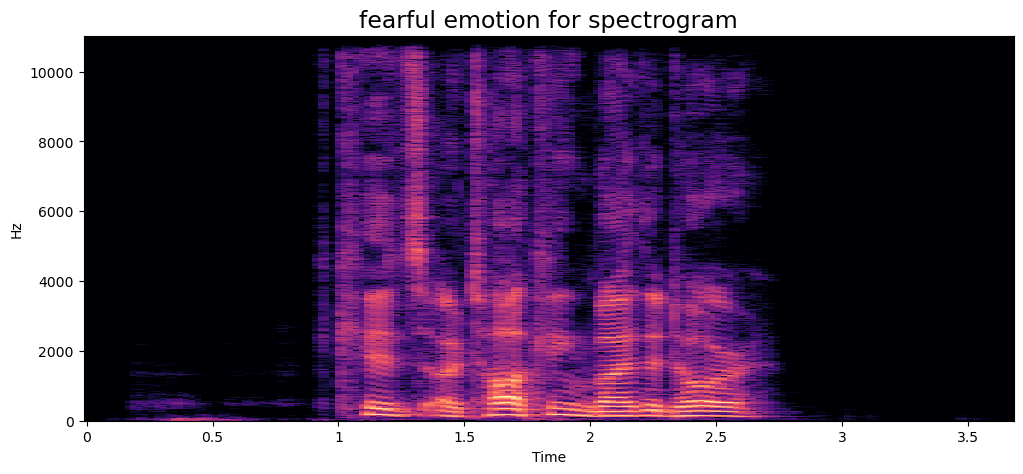

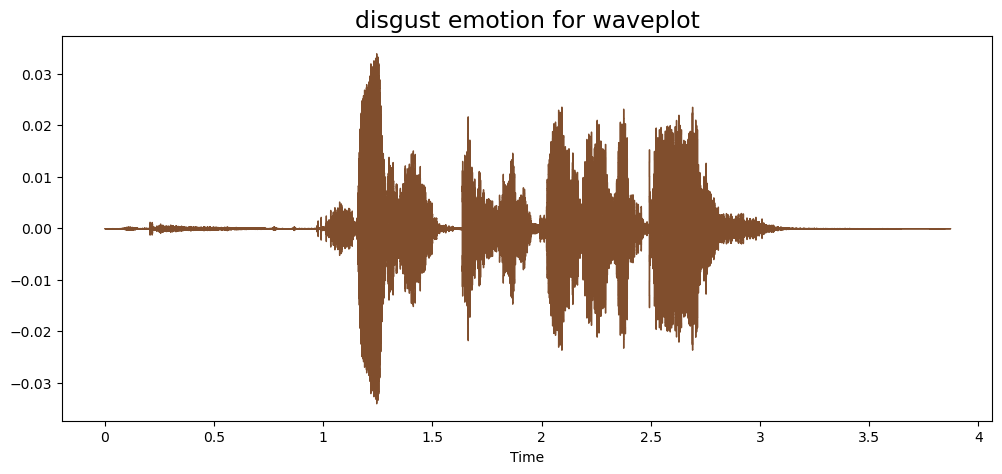

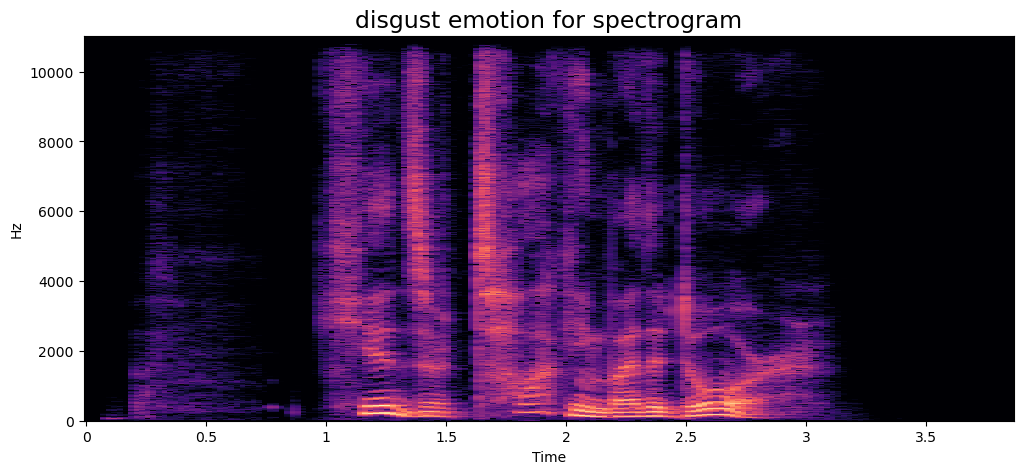

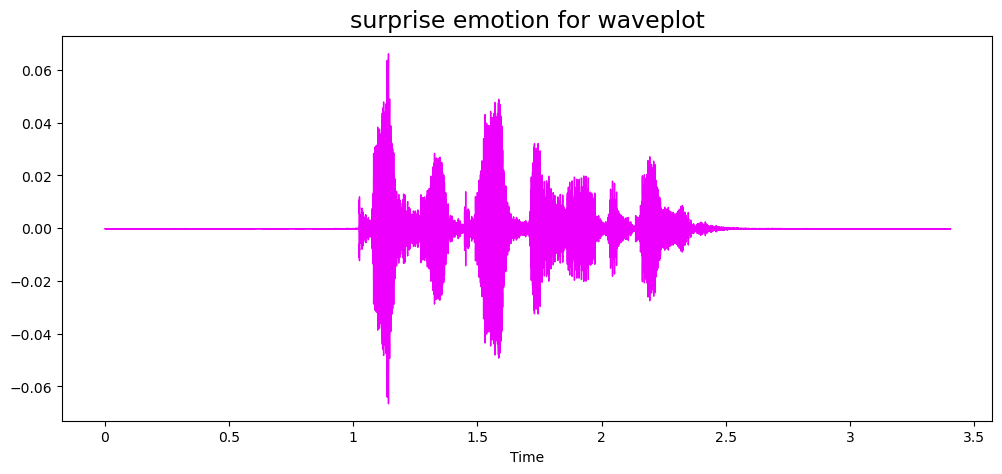

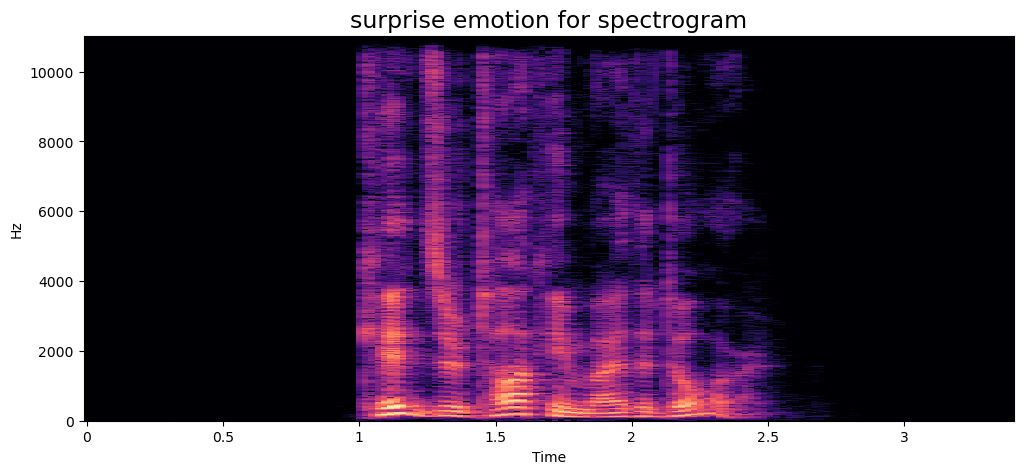

In [65]:
# Initializing an empty list to store the file paths
audio_path = []

# Iterating through each unique emotion in the dataset
for emotion in emotion_names:
    # Extracting the file path for the first occurrence of the emotion in the Ravdess DataFrame
    path = np.array(Ravdess_df['File_Path'][Ravdess_df['Emotion'] == emotion])[0]

    # Loading the audio data and its sample rate using librosa
    data, sr = librosa.load(path)

    # Plotting the waveplot for the emotion
    wave_plot(data, sr, emotion, colors[emotion])

    # Plotting the spectrogram for the emotion
    spectrogram(data, sr, emotion)

    # Appending the file path to the audio_path list
    audio_path.append(path)

## Audios For Different Emotions

### 1.Neutral

In [66]:
print('neutral Audio Sample\n')
IPython.display.Audio(audio_path[0])

neutral Audio Sample



### 2.Calm

In [67]:
print('calm Audio Sample\n')
IPython.display.Audio(audio_path[1])

calm Audio Sample



### 3.Happy

In [68]:
print('happy Audio Sample\n')
IPython.display.Audio(audio_path[2])

happy Audio Sample



### 4.Sad

In [69]:
print('sad Audio Sample\n')
IPython.display.Audio(audio_path[3])

sad Audio Sample



### 5.Angry

In [70]:
print('angry Audio Sample\n')
IPython.display.Audio(audio_path[4])

angry Audio Sample



### 6.Fearful

In [71]:
print('fearful Audio Sample\n')
IPython.display.Audio(audio_path[5])

fearful Audio Sample



### 7.Disgust

In [72]:
print('disgust Audio Sample\n')
IPython.display.Audio(audio_path[6])

disgust Audio Sample



### 8.Surprise

In [73]:
print('Suprise Audio Sample\n')
IPython.display.Audio(audio_path[7])

Suprise Audio Sample



In [74]:
def zcr(data, frame_length=2048, hop_length=512):
    """
    Calculate Zero Crossing Rate (ZCR) of the audio data.

    Parameters:
    - data: Audio data.
    - frame_length: Length of each frame for analysis.
    - hop_length: Number of samples to advance between frames.

    Returns:
    - ZCR feature.
    """
    zcr = librosa.feature.zero_crossing_rate(data, frame_length=frame_length, hop_length=hop_length)
    return np.squeeze(zcr)

def rmse(data, frame_length=2048, hop_length=512):
    """
    Calculate Root Mean Square Error (RMSE) of the audio data.

    Parameters:
    - data: Audio data.
    - frame_length: Length of each frame for analysis.
    - hop_length: Number of samples to advance between frames.

    Returns:
    - RMSE feature.
    """
    rmse = librosa.feature.rms(y=data, frame_length=frame_length, hop_length=hop_length)[0]
    return np.squeeze(rmse)

def mfcc(data, sr, frame_length=2048, hop_length=512, n_mfcc=13, flatten: bool = True):
    """
    Compute Mel-Frequency Cepstral Coefficients (MFCCs) of the audio data.

    Parameters:
    - data: Audio data.
    - sr: Sampling rate of the audio data.
    - frame_length: Length of each frame for analysis.
    - hop_length: Number of samples to advance between frames.
    - n_mfcc: Number of MFCCs to return.
    - flatten: If True, flatten the resulting matrix.

    Returns:
    - MFCC features.
    """
    mono_data = librosa.core.audio.to_mono(data)
    mfcc = librosa.feature.mfcc(y=mono_data, sr=sr, n_mfcc=n_mfcc)
    return np.squeeze(mfcc.T) if not flatten else np.ravel(mfcc.T)

def extract_features(data, sr, frame_length=2048, hop_length=512):
    """
    Extract a combination of features from the audio data.

    Parameters:
    - data: Audio data.
    - sr: Sampling rate of the audio data.
    - frame_length: Length of each frame for analysis.
    - hop_length: Number of samples to advance between frames.

    Returns:
    - Combined feature vector.
    """
    result = np.array([])
    result = np.hstack((result, zcr(data, frame_length, hop_length), rmse(data, frame_length, hop_length), mfcc(data, sr, frame_length, hop_length)))
    return result


In [75]:
# Initialize empty lists to store features (X) and corresponding emotions (Y)
X, Y = [], []

# Iterate over each audio file path, emotion, and its index in the DataFrame
for path, emotion, index in zip(Ravdess_df.File_Path, Ravdess_df.Emotion, range(Ravdess_df.File_Path.shape[0])):
    # Load audio data using librosa with a duration of 2.5 seconds and an offset of 0.6 seconds
    data, sr = librosa.load(path, duration=2.5, offset=0.0)

    # Extract features using the defined 'extract_features' function
    aud = extract_features(data, sr)

    # Append the extracted features and corresponding emotion to the lists
    X.append(aud)
    Y.append(emotion)

# Print the total number of audio files processed after the loop completes
print(f'Total {index + 1} audio files have been processed')

Total 1440 audio files have been processed


# processed data

In [76]:
# Create a DataFrame 'extract' with features (X) and corresponding emotions (Y)
extract = pd.DataFrame(X)

# Add the 'Emotion' column to the DataFrame and populate it with the emotion labels
extract['Emotion'] = Y

In [77]:
# Display the 'extract' DataFrame
extract

0         1         2         3         4         5         6  \
0     0.110352  0.221680  0.337402  0.460449  0.506348  0.611328  0.708984   
1     0.214355  0.355469  0.517578  0.486328  0.663086  0.626953  0.639648   
2     0.200684  0.311523  0.479004  0.473145  0.530762  0.528809  0.476562   
3     0.361328  0.524414  0.680664  0.674805  0.645508  0.663574  0.657227   
4     0.349121  0.532715  0.724609  0.708008  0.779785  0.798340  0.830566   
...        ...       ...       ...       ...       ...       ...       ...   
1435  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
1436  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
1437  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
1438  0.000000  0.000000  0.000000  0.000000  0.044434  0.257324  0.425781   
1439  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   

             7         8         9  ...       1611       1612       1613  \
0     0.639160  0.716797  0.693848  ...  14.629028  10.268604   6.981929   
1     0.639648  0.636230  0.741211  ...   9.438256  10.480009   6.164505   
2     0.575195  0.595703  0.708984  ...   7.289022   9.963935   7.101918   
3     0.669434  0.697754  0.689453  ...  12.204953  12.846457   8.026142   
4     0.851562  0.848145  0.875000  ...   1.245147  12.516287  -2.572999   
...        ...       ...       ...  ...        ...        ...        ...   
1435  0.000000  0.000000  0.000000  ...   7.162401  -1.191289  -4.543378   
1436  0.000000  0.000000  0.000000  ...  16.311102 -19.622929 -14.359459   
1437  0.000000  0.000000  0.000000  ...   8.086204 -25.786552 -35.867004   
1438  0.500000  0.455566  0.242188  ... -20.750225  -2.745299 -31.015575   
1439  0.000000  0.000000  0.000000  ... -37.876060 -39.349915 -13.843460   

           1614       1615       1616       1617       1618       1619  \
0      3.898833   0.944180  -1.115814  -1.516483  -0.353689   1.347757   
1     -2.296751  -7.020356  -3.450191  -0.149355  -2.015479  -1.410164   
2     -0.740837  -5.960251  -4.361567   0.244729   1.718720  -1.116788   
3     -1.390714  -7.592461  -6.000176  -0.975650   0.626522  -2.229803   
4     -3.512290 -23.652346 -17.310520   7.310167  -0.888581  28.537086   
...         ...        ...        ...        ...        ...        ...   
1435  -8.167467  -4.802139  -8.505807 -14.540371  -6.416600  -1.475573   
1436 -18.845032  -3.234788  -8.661440 -19.254360  -6.338716 -13.206778   
1437 -21.262318  -7.418221 -13.584351 -24.137070  12.820434   3.555451   
1438 -22.106646 -14.885605  -9.857632 -15.907150  -0.228467 -13.561248   
1439   5.725060 -41.275696 -10.783872 -13.462801 -10.800049 -13.042128   

       Emotion  
0      neutral  
1      neutral  
2      neutral  
3      neutral  
4         calm  
...        ...  
1435  surprise  
1436  surprise  
1437  surprise  
1438  surprise  
1439  surprise  

[1440 rows x 1621 columns]

In [78]:
# Check for null values in the entire DataFrame
null_values = extract.isnull()

# Count the number of null values in each column
null_count = null_values.sum()

# Display the result
print("Null values in each column:")
print(null_count)

Null values in each column:
0          0
1          0
2          0
3          0
4          0
          ..
1616       0
1617       0
1618       0
1619       0
Emotion    0
Length: 1621, dtype: int64


In [79]:
# Check for null values in the entire DataFrame
total_null_count = null_values.sum().sum()

print(f"Total null values in the DataFrame: {total_null_count}")


Total null values in the DataFrame: 0


In [80]:
# Save the DataFrame to a CSV file at the specified path
extract.to_csv('processed_data.csv', index=False)